## Logistic Regression

#### Cost Function
#### $max \sum\limits_{i=1}^{n}y_{i}w_{i}^{T}X_{i}$

#### we pass our value into a sigmoid function in a way that ranges from 0 to 1
#### $\frac{1}{1+e^{-z}}$ ,where $z=y_{i}\times x_{i}$
#### This sigmoid function actually reduces the effect of outliers

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('titanics.csv')
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,1
2,3,1,26.0,0,0,7.9250,1,1
3,1,1,35.0,1,0,53.1000,1,1
4,3,0,35.0,0,0,8.0500,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   int64  
 2   Age       1223 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1309 non-null   int64  
 7   Survived  1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


In [16]:
df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Survived     0
dtype: int64

In [17]:
df['Age'].values

array([22. , 38. , 26. , ..., 38.5,  nan,  nan])

<Axes: ylabel='Age'>

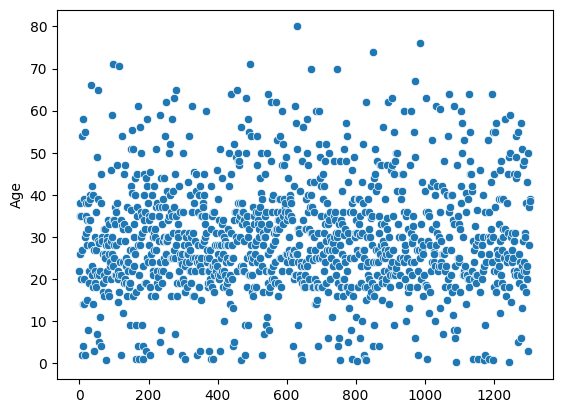

In [19]:
sns.scatterplot(df['Age'])

In [20]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<Axes: ylabel='Fare'>

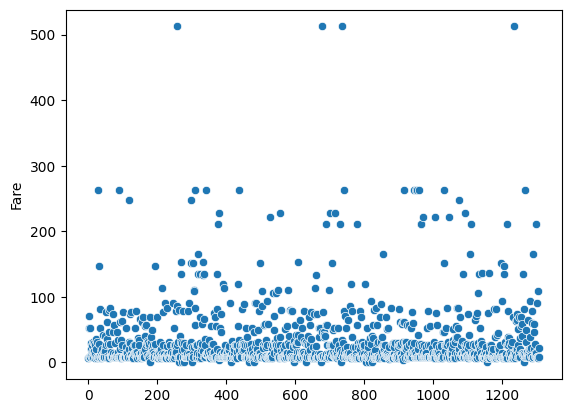

In [21]:
sns.scatterplot(df['Fare'])

In [24]:
df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)

In [25]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df.drop('Survived', axis=1)
y=df['Survived']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [30]:
scaler=StandardScaler()
Xtrain_scale=scaler.fit_transform(X_train)
Xtest_scale=scaler.fit_transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logic=LogisticRegression()
logic.fit(Xtrain_scale,y_train)

LogisticRegression()

In [34]:
pred=logic.predict(Xtest_scale)

In [35]:
pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [38]:
accuracy_score(y_test,pred)

0.8628048780487805

In [39]:
precision_score(y_test,pred)

0.8759124087591241

In [40]:
recall_score(y_test,pred)

0.8108108108108109

In [41]:
f1_score(y_test,pred)

0.8421052631578948

In [49]:
def cross(X,y):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(logic, X, y, cv=5)
    print("Cross-validation scores: {}".format(scores))
    print("Average cross-validation score: {:.2f}".format(np.mean(scores)))

### Diabetes Data

In [47]:
df=pd.read_csv('Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [51]:
cross(X,y)

Cross-validation scores: [0.77272727 0.74675325 0.75974026 0.81699346 0.75163399]
Average cross-validation score: 0.77


E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [53]:
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)

In [57]:
logic.fit(X_train_scale,y_train)

LogisticRegression()

In [58]:
pred=logic.predict(X_test_scale)

In [60]:
accuracy_score(y_test,pred)

0.796875

In [61]:
precision_score(y_test,pred)

0.7346938775510204

In [62]:
f1_score(y_test,pred)

0.6486486486486487

#### Hyper Paramteric Tuning

In [29]:
# hyperparameter tuning using grid search
def tuning_hyperparam(X,y):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    logreg = LogisticRegression()
    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100,1000,10000], 'solver': ['liblinear', 'saga','newton-cg']}
    grid = GridSearchCV(logreg, param_grid=param_grid, cv=5)
    grid.fit(X, y)
    print(grid.best_params_)


In [30]:
tuning_hyperparam(X,y)

E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [71]:
logic=LogisticRegression(C=100,penalty='l2',solver='liblinear')
logic.fit(X_train,y_train)

LogisticRegression(C=100, solver='liblinear')

In [72]:
pred=logic.predict(X_test)

In [73]:
accuracy_score(y_test,pred)

0.8020833333333334

In [74]:
precision_score(y_test,pred)

0.75

In [75]:
f1_score(y_test,pred)

0.6545454545454547

In [2]:
df=pd.read_csv('mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [11]:
df.dropna(subset=['price_range'],inplace=True)

In [12]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [13]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
tuning_hyperparam(X,y)

E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=0.01,penalty='l2',solver='newton-cg')
model.fit(X_train,y_train)

E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.01, solver='newton-cg')

In [32]:
pred=model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       125
         1.0       0.97      0.97      0.97       135
         2.0       0.96      0.97      0.96       115
         3.0       0.98      0.98      0.98       125

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

